In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import warnings
import cv2
import keras
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
from PIL import Image
from keras import models, layers, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [4]:
# Dinh nghia cac bien

gestures = {'L_': 'L',
           'fi': 'E',
           'ok': 'F',
           'pe': 'V',
           'pa': 'B'
            }

gestures_map = {'E': 0,
                'L': 1,
                'F': 2,
                'V': 3,
                'B': 4
                }


gesture_names = {0: 'E',
                 1: 'L',
                 2: 'F',
                 3: 'V',
                 4: 'B'}


image_path = '/content/drive/MyDrive/data2'
rgb = False
imageSize = 224


# Ham xu ly anh resize ve 224x224 va chuyen ve numpy array
def process_image(path):
    img = Image.open(path)
    img = img.resize((imageSize, imageSize))
    img = np.array(img)
    return img

# Xu ly du lieu dau vao
def process_data(X_data, y_data):
    X_data = np.array(X_data, dtype = 'float32')
    if rgb:
        pass
    else:
        X_data = np.stack((X_data,)*3, axis=-1)
    X_data /= 255
    return X_data, y_data

# Ham duyet thu muc anh dung de train
def walk_file_tree(image_path):
    X_data = []
    y_data = []
    for directory, subdirectories, files in os.walk(image_path):
        for file in files:
            if not file.startswith('.'):
                path = os.path.join(directory, file)
                gesture_name = gestures[file[0:2]]
                print(gesture_name)
                print(gestures_map[gesture_name])
                y_data.append(gestures_map[gesture_name])
                X_data.append(process_image(path))

            else:
                continue

    X_data, y_data = process_data(X_data, y_data)
    return X_data, y_data




# Load du lieu vao X va Y
X_data, y_data = walk_file_tree(image_path)
# Phan chia du lieu train va test theo ty le 80/20
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=12, stratify=y_data)

V
3
V
3
B
4
B
4
B
4
V
3
B
4
V
3
V
3
V
3
B
4
B
4
V
3
V
3
V
3
V
3
V
3
V
3
V
3
V
3
V
3
B
4
V
3
B
4
V
3
B
4
B
4
B
4
V
3
V
3
V
3
B
4
B
4
V
3
B
4
B
4
V
3
V
3
B
4
V
3
V
3
V
3
V
3
B
4
V
3
B
4
B
4
V
3
V
3
B
4
V
3
V
3
V
3
B
4
V
3
B
4
B
4
V
3
V
3
B
4
B
4
B
4
B
4
V
3
B
4
B
4
V
3
B
4
V
3
B
4
V
3
V
3
V
3
V
3
V
3
B
4
V
3
B
4
B
4
V
3
V
3
V
3
B
4
V
3
B
4
B
4
B
4
V
3
V
3
B
4
B
4
V
3
V
3
V
3
B
4
V
3
B
4
V
3
V
3
B
4
B
4
B
4
B
4
B
4
V
3
B
4
V
3
B
4
B
4
B
4
V
3
V
3
B
4
B
4
V
3
V
3
V
3
V
3
B
4
B
4
B
4
V
3
B
4
V
3
B
4
V
3
V
3
V
3
B
4
B
4
V
3
V
3
V
3
V
3
B
4
B
4
B
4
V
3
V
3
B
4
V
3
B
4
B
4
V
3
B
4
V
3
B
4
B
4
B
4
B
4
B
4
V
3
B
4
V
3
B
4
B
4
V
3
V
3
B
4
B
4
V
3
V
3
V
3
B
4
V
3
B
4
V
3
B
4
V
3
V
3
V
3
B
4
V
3
B
4
B
4
B
4
B
4
B
4
B
4
B
4
B
4
B
4
V
3
B
4
B
4
B
4
V
3
V
3
V
3
B
4
V
3
B
4
B
4
B
4
V
3
B
4
B
4
V
3
V
3
V
3
V
3
B
4
V
3
B
4
V
3
B
4
V
3
B
4
V
3
B
4
V
3
V
3
V
3
B
4
V
3
B
4
V
3
B
4
V
3
B
4
B
4
V
3
B
4
B
4
B
4
B
4
V
3
B
4
B
4
B
4
B
4
B
4
V
3
V
3
V
3
B
4
B
4
V
3
B
4
V
3
B
4
B
4
V
3
V
3
B
4
B
4
B
4
V
3
B
4
V
3


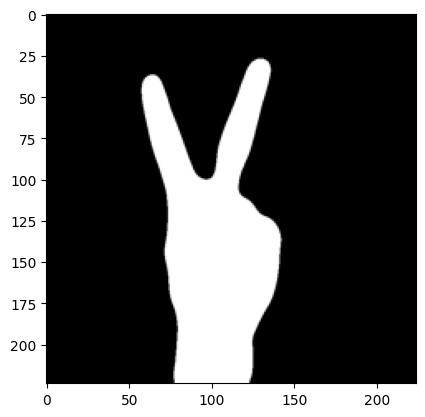

In [5]:
plt.imshow(X_train[5])

<ipython-input-6-8e98e3ff82fa>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


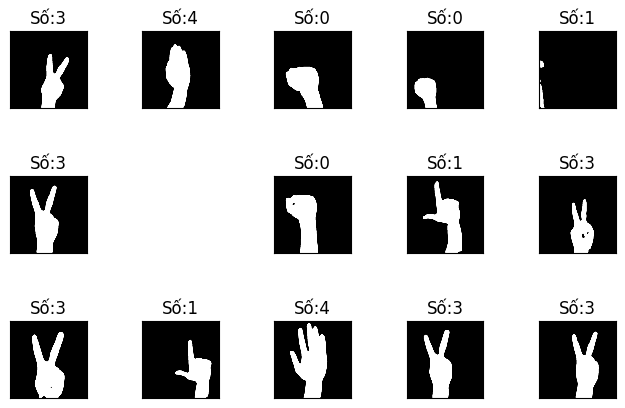

In [6]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation="none")
  plt.title("Số:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
print(len(X_train))

1758


AttributeError: ignored

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(224,224,3),padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
28/28 [==============================] - 21s 297ms/step - loss: 1.0288 - accuracy: 0.6240 - val_loss: 0.5567 - val_accuracy: 0.7955
Epoch 2/100
28/28 [==============================] - 3s 116ms/step - loss: 0.2194 - accuracy: 0.9266 - val_loss: 0.2599 - val_accuracy: 0.8955
Epoch 3/100
28/28 [==============================] - 3s 116ms/step - loss: 0.0377 - accuracy: 0.9903 - val_loss: 0.3118 - val_accuracy: 0.8886
Epoch 4/100
28/28 [==============================] - 4s 138ms/step - loss: 0.0149 - accuracy: 0.9977 - val_loss: 0.2621 - val_accuracy: 0.9159
Epoch 5/100
28/28 [==============================] - 3s 117ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.2524 - val_accuracy: 0.9182
Epoch 6/100
28/28 [==============================] - 3s 119ms/step - loss: 7.2346e-04 - accuracy: 1.0000 - val_loss: 0.2612 - val_accuracy: 0.9295
Epoch 7/100
28/28 [==============================] - 3s 119ms/step - loss: 2.4758e-04 - accuracy: 1.0000 - val_loss: 0.2660 - val_accurac

In [12]:
model.save('mymodel2.h5')

In [13]:
Score=model.evaluate(X_train,y_train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  8.478186259708309e-07
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


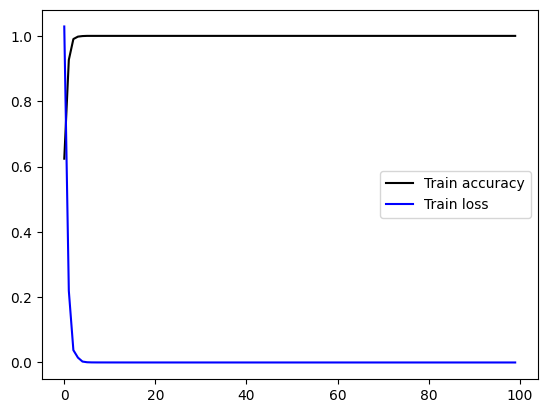

In [14]:

accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()



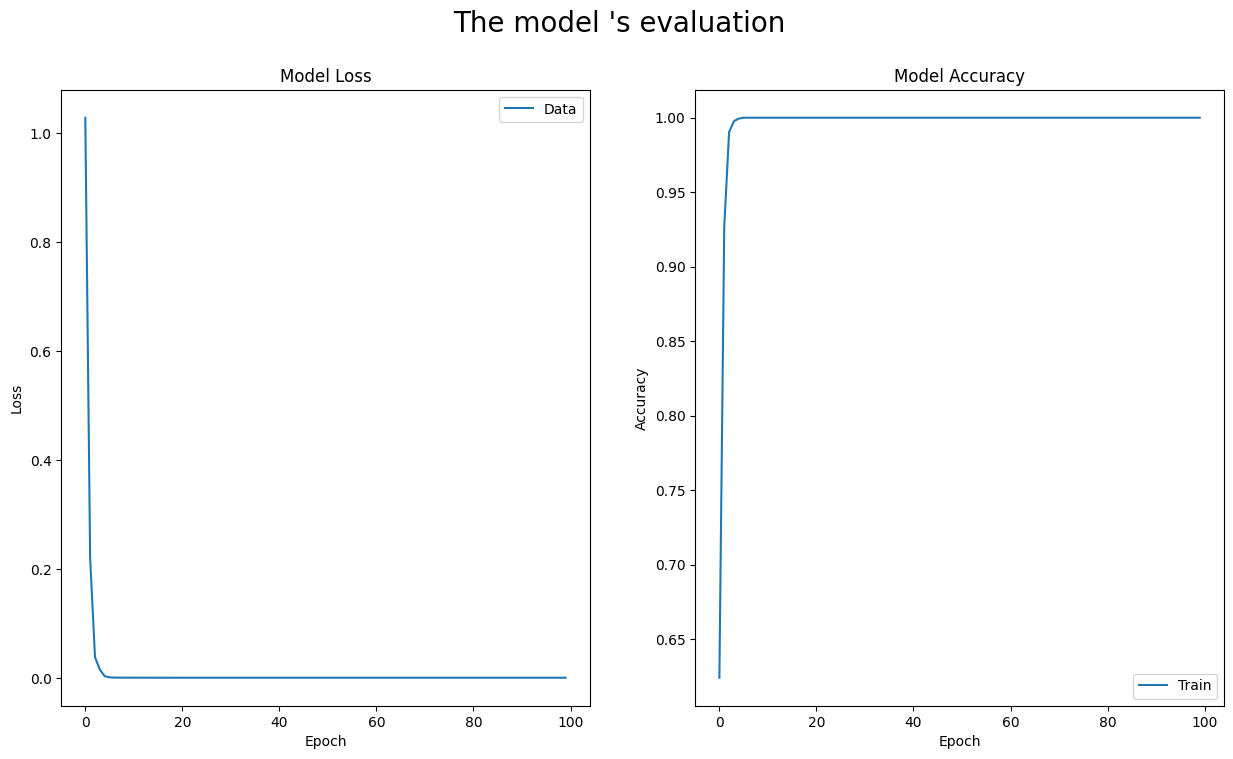

In [15]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(history.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(history.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])

plt.show()

1/1 [==============================] - 0s 40ms/step


array([1])

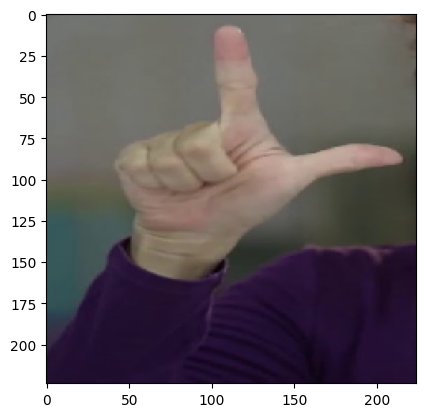

In [18]:
img  = load_img('test.jpg',target_size=(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/225
prediction = model.predict(img).argmax()
np.argmax(model.predict(img),axis=-1)